# Example 2: Points Earned and Lost by Teams

In [1]:
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load all teams and season stats for the 2022 teams
teams = nwslpy.load_teams()

teams_2022 = ["CHI", "HOU", "NJY", "RGN", "ORL", "POR", "WAS", "NC", "KCC", "LOU", "LA", "SD"]
df = pd.concat(
    [nwslpy.load_team_season_stats(team, "2022") for team in teams_2022]
).set_index("team_id")
df.head()

,season,duels_ground,possession_pct,red_cards_2nd_yellow,corners_won,recoveries,long_passes_unsuccessful,goals_outside_box,aerial_duels_lost,goals,...,goals_away,last_updated,own_goal_conceded,own_goal_accrued,tackle_last_man,tackles_last_man,goals_set_piece,goalkicks_total,goals_other,penalties_off_target
team_id,,,,,,,,,,,,,,,,,,,,,
2,2022,1716,52,1.0,126,1674,685,7,253,35,...,19,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,1702,47,NaN,112,1707,934,3,287,36,...,19,2023-02-18,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,1564,49,1.0,92,1558,736,1,231,16,...,8,2023-02-18,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022,1745,50,1.0,101,1787,725,3,264,32,...,13,2023-02-18,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
7,2022,1679,48,NaN,90,1527,608,1,184,22,...,8,2023-02-18,NaN,2.0,3.0,3.0,NaN,NaN,NaN,NaN


In [9]:
# Select only the needed columns
df = df[["pts_gained_from_losing_positions", "pts_dropped_from_win_position"]]

# Negate the points dropped so the bars go to the left
df["pts_dropped_from_win_position"] = -df["pts_dropped_from_win_position"]

# Join with team information to get team abbreviation
df = df.join(teams[["team_abbreviation"]]).reset_index()
df

,team_id,pts_gained_from_losing_positions,pts_dropped_from_win_position,team_abbreviation
0,2,3,-8,CHI
1,4,11,-9,HOU
2,5,1,-5,NJY
3,6,13,-9,RGN
4,7,4,-9,ORL
5,8,6,-12,POR
6,9,7,-11,WAS
7,11,2,-16,NC
8,13,11,-6,KCC
9,14,7,-9,LOU


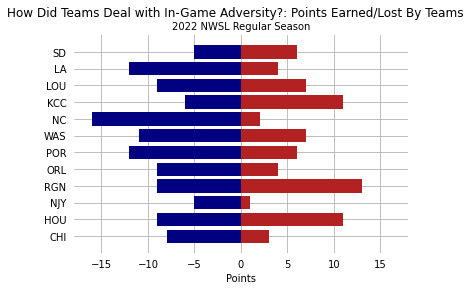

In [10]:
# Plot results
fig, ax = plt.subplots()
ax.barh(df.index, df["pts_dropped_from_win_position"], color="navy")
ax.barh(df.index, df["pts_gained_from_losing_positions"], color="firebrick")

# Format ticks and axis labels
ax.spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_axisbelow(True)
ax.grid()
ax.set_yticks(df.index, labels=df["team_abbreviation"])
ax.set_xlabel("Points")
ax.set_xlim([-18, 18])

# Add title and subtitle
plt.suptitle(
    "How Did Teams Deal with In-Game Adversity?: Points Earned/Lost By Teams",
)
plt.title("2022 NWSL Regular Season", size=10);